In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from src.model import LeNet5
from src.exp import run_experiment, run_experiment_all_optimizers
from torch.optim import LBFGS, Adam

from optim_adahessian import Adahessian
from apollo import Apollo


import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)   

%load_ext autoreload
%autoreload 2

INFO:root:Training: Epoch = 0, loss = 1.2349018176396689, Accuracy 0.6464333534240723
INFO:root:Validation: Epoch = 0, loss = 0.4102752521634102, Accuracy 0.8718000054359436
INFO:root:Training: Epoch = 1, loss = 0.30573841656247774, Accuracy 0.9090666770935059
INFO:root:Validation: Epoch = 1, loss = 0.2161202035844326, Accuracy 0.9341999888420105
INFO:root:Training: Epoch = 2, loss = 0.1932514302432537, Accuracy 0.9435166716575623
INFO:root:Validation: Epoch = 2, loss = 0.14173111990094184, Accuracy 0.9574999809265137
INFO:root:Training: Epoch = 3, loss = 0.14034926891326904, Accuracy 0.9596333503723145
INFO:root:Validation: Epoch = 3, loss = 0.10496078208088874, Accuracy 0.9686999917030334
INFO:root:Training: Epoch = 4, loss = 0.11189651613434155, Accuracy 0.9674333333969116
INFO:root:Validation: Epoch = 4, loss = 0.08478966113179923, Accuracy 0.9726999998092651
INFO:root:Training: Epoch = 5, loss = 0.0941242028027773, Accuracy 0.9723333716392517
INFO:root:Validation: Epoch = 5, loss 

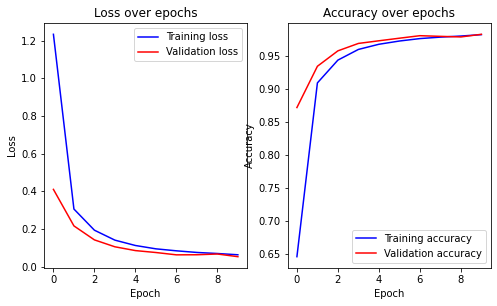

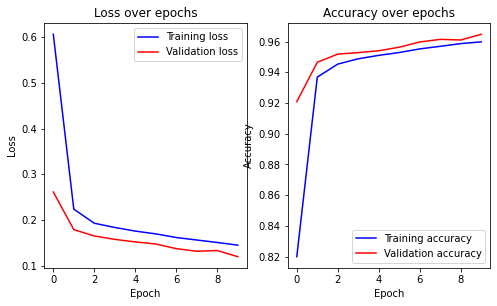

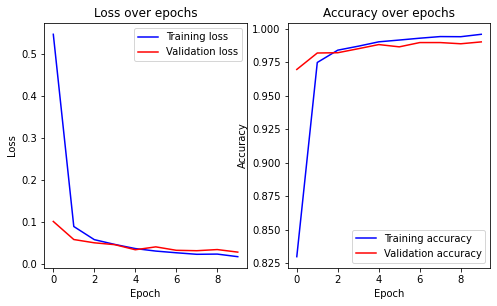

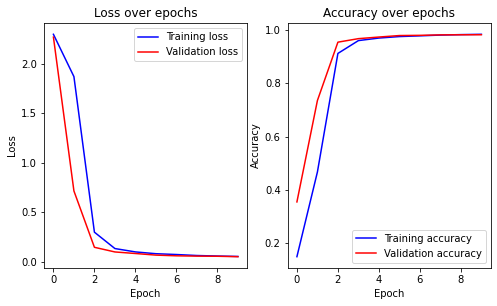

In [7]:
results = run_experiment_all_optimizers('MNIST', [torch.optim.Adam, LBFGS, Adahessian, Apollo], num_epochs=10)

In [8]:
results

[{'dataset': 'MNIST',
  'optimizer': torch.optim.adam.Adam,
  'training_losses': [1.2349018176396689,
   0.30573841656247774,
   0.1932514302432537,
   0.14034926891326904,
   0.11189651613434155,
   0.0941242028027773,
   0.08359252959489823,
   0.07491545093556246,
   0.06928733754903078,
   0.0625433262437582],
  'test_losses': [0.4102752521634102,
   0.2161202035844326,
   0.14173111990094184,
   0.10496078208088874,
   0.08478966113179923,
   0.07455484811216592,
   0.062182722799479964,
   0.06266328729689122,
   0.06659366451203823,
   0.052416360937058926],
  'training_accuracies': [tensor(0.6464, device='cuda:0'),
   tensor(0.9091, device='cuda:0'),
   tensor(0.9435, device='cuda:0'),
   tensor(0.9596, device='cuda:0'),
   tensor(0.9674, device='cuda:0'),
   tensor(0.9723, device='cuda:0'),
   tensor(0.9760, device='cuda:0'),
   tensor(0.9782, device='cuda:0'),
   tensor(0.9799, device='cuda:0'),
   tensor(0.9820, device='cuda:0')],
  'test_accuracies': [tensor(0.8718, device=

In [17]:
def plot_results(results):
    fig, ax = plt.subplots(ncols=2)
    ax[0].set_title('Training Accuracy')
    ax[1].set_title('Test Accuracy')
    
    for result in results:
        ax[0].plot(range(10), result['test_accuracies'], label=str(result['optimizer']))
    fig.legend()

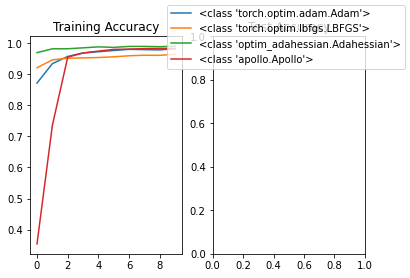

In [18]:

plot_results(results)